In [391]:
CLIENT_ID = "**********************"
CLIENT_SECRET = "*********************"
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

## Description of the problem

I am comparing two cityies of germany (Bonn and cologn) both cities are in one provence with the distance of almost 24 Kilumeters. Imagin that some people who have to  move from one city to another and would like to find the ereas similar to part of  cities they are living now in order to look for a place to move to. I would like to compre the city neighborhoods of two cities (bonn and cologn) to earn some information about similar ereas.

I explor  Bonn City and cologn and segmented and clustered their neighborhoods. Both cities are somehow similar however with very different size and facilities. I will discover where are the parts with more resturants.

In the next step I would like to some add other cities (10 famous cities) of germany and get how similar or dissimilar they are.

## Some Background about the cities

#### Bonn
The Federal city of Bonn is a city on the banks of the Rhine in the German state of North Rhine-Westphalia, with a population of over 300,000. About 24 km (15 mi) south-southeast of Cologne, Bonn is in the southernmost part of the Rhine-Ruhr region, Germany's largest metropolitan area, with over 11 million inhabitants. It is famously known as the birthplace of Ludwig van Beethoven in 1770 as well as the capital city of West Germany until 1990.


#### Cologne
Cologne(Köln) is the largest city of Germany's most populous federal state of North Rhine-Westphalia and the fourth-most populous city in Germany. With slightly over a million inhabitants (1.09 million) within its city boundaries, Cologne is the largest city on the Rhine and also the most populous city both of the Rhine-Ruhr Metropolitan Region, which is Germany's largest and one of Europe's major metropolitan areas, and of the Rhineland.


<div class="alert alert-block alert-info" style="margin-top: 20px">
Here I consider each city part with a postal code as a specific neighborhood
<div>

In [261]:
#obtain the geodata and postal codes 
#reading geodata of germany
german_geo = pd.read_csv("de_postal_codes.csv",encoding='cp1252')

In [262]:
german_geo.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude,Unnamed: 7
0,1945.0,Kroppen,Brandenburg,BB,Oberspreewald-Lausitz,51.3833,13.8000,NaN
1,1968.0,Schipkau,Brandenburg,BB,Oberspreewald-Lausitz,51.5456,13.9121,NaN
2,1979.0,Lauchhammer,Brandenburg,BB,Oberspreewald-Lausitz,51.5000,13.7667,NaN
3,1983.0,Großräschen,Brandenburg,BB,Oberspreewald-Lausitz,51.5833,14.0000,NaN
4,1987.0,Schwarzheide,Brandenburg,BB,Oberspreewald-Lausitz,51.4653,13.8680,NaN


In [265]:
#number of postalcodes in every state
german_geo["State Abbreviation"].value_counts()

BY    2076
BW    1208
NW     869
NI     823
RP     661
HE     549
SH     451
SN     390
TH     225
BB     224
ST     217
MV     196
BE     191
HH     101
SL      69
HB      41
Name: State Abbreviation, dtype: int64

#### selecting some cities and cleaning

In [284]:
german_geo["Postal Code"] = german_geo["Postal Code"].apply(lambda a: str(a).split('.')[0])

In [288]:
german_geo.drop("Unnamed: 7",axis=1, inplace=True)

In [291]:
nrw = german_geo[german_geo["State Abbreviation"]=="NW"]

In [292]:
len(nrw)

869

In [293]:
nrw.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
5409,40210,Düsseldorf,Nordrhein-Westfalen,NW,"Düsseldorf, Stadt",51.2216,6.7898
5410,40211,Düsseldorf,Nordrhein-Westfalen,NW,"Düsseldorf, Stadt",51.2278,6.7861
5411,40212,Düsseldorf,Nordrhein-Westfalen,NW,"Düsseldorf, Stadt",51.2230,6.7827
5412,40213,Düsseldorf,Nordrhein-Westfalen,NW,"Düsseldorf, Stadt",51.2249,6.7742
5413,40215,Düsseldorf,Nordrhein-Westfalen,NW,"Düsseldorf, Stadt",51.2165,6.7836


In [552]:
bonn_geo = nrw[nrw["Place Name"]=="Bonn"]
bonn_geo.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
5803,53111,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7362,7.1002
5804,53113,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7230,7.1068
5805,53115,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7272,7.0851
5806,53117,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7610,7.0630
5807,53119,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7431,7.0590


In [545]:
koeln_geo = nrw[nrw["Place Name"]=="Köln"]
koeln_geo.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
5696,50667,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9384,6.9543
5697,50668,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9477,6.9609
5698,50670,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9525,6.9571
5699,50672,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9466,6.9391
5700,50674,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9326,6.9410


In [575]:
koelnBonn_f = [nrw[nrw["Place Name"]=="Köln"] ,nrw[nrw["Place Name"]=="Bonn" ]]
koelnBonn_geo = pd.concat(koelnBonn_f)
koelnBonn_geo.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
5696,50667,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9384,6.9543
5697,50668,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9477,6.9609
5698,50670,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9525,6.9571
5699,50672,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9466,6.9391
5700,50674,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9326,6.9410


In [553]:
bonn_geo.shape
#number of postal codes in bonn city

(17, 7)

In [546]:
koeln_geo.shape
#number od postal codes in cologn city

(45, 7)

In [577]:
# both cities
koelnBonn_geo.shape

(62, 7)

In [210]:
#!pip install geopy
#!pip install folium

In [60]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Use geopy library to get the latitude and longitude

In [791]:
address = 'Bonn'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bonn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bonn are 50.735851, 7.10066.


In [548]:
address = 'Köln'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_k = location.latitude
longitude_k = location.longitude
print('The geograpical coordinate of Köln are {}, {}.'.format(latitude_k, longitude_k))

The geograpical coordinate of Köln are 50.938361, 6.959974.


In [ ]:
#showing the differe

In [792]:
# create map of Bonn
mapb = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, PlaceName, neighborhood in zip(bonn_geo['Latitude'], bonn_geo['Longitude'], bonn_geo['Place Name'], bonn_geo['Postal Code']):
    label = '{}, {}'.format(neighborhood, PlaceName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#CC0000',
        fill=True,
        fill_color='#CC0000',
        fill_opacity=0.7,
        parse_html=False).add_to(mapb)
    
for lat, lng, PlaceName, neighborhood in zip(koeln_geo['Latitude'], koeln_geo['Longitude'], koeln_geo['Place Name'], koeln_geo['Postal Code']):
    label = '{}, {}'.format(neighborhood, PlaceName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#0066CC',
        fill=True,
        fill_color='#0066CC',
        fill_opacity=0.7,
        parse_html=False).add_to(mapb) 
    
mapb

<div class="alert alert-block alert-info" style="margin-top: 20px">
showing the areas of city bonn(red) and city cologn (blue) as you can see cologn is a big city in compare to bonn
<div>

In [407]:
#folium.CircleMarker?

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

### Explore Neighborhood in Bonn and cologn

In [302]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### explore and Analyze Each Neighborhood 

In [390]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. 

In [304]:
print(len(bonn_geo))
bonn_geo.head()

17


,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
5803,53111,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7362,7.1002
5804,53113,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7230,7.1068
5805,53115,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7272,7.0851
5806,53117,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7610,7.0630
5807,53119,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7431,7.0590


In [395]:
Bonn_venues = getNearbyVenues(names=bonn_geo['Postal Code'],
                                   latitudes=bonn_geo['Latitude'],
                                   longitudes=bonn_geo['Longitude']
                                  )

53111
53113
53115
53117
53119
53121
53123
53125
53127
53129
53173
53175
53177
53179
53225
53227
53229


In [700]:
#Bonn_venues["city"]="bonn"
#Bonn_venues

In [559]:
koeln_venues = getNearbyVenues(names=koeln_geo['Postal Code'],
                                   latitudes=koeln_geo['Latitude'],
                                   longitudes=koeln_geo['Longitude']
                                  )

50667
50668
50670
50672
50674
50676
50677
50678
50679
50733
50735
50737
50739
50765
50767
50769
50823
50825
50827
50829
50858
50859
50931
50933
50935
50937
50939
50968
50969
50996
50997
50999
51061
51063
51065
51067
51069
51103
51105
51107
51109
51143
51145
51147
51149


In [561]:
Bonn_venues.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,53111,50.7362,7.1002,Marktplatz,50.735419,7.101961,Plaza
1,53111,50.7362,7.1002,Weinkommissar,50.736651,7.099702,Wine Bar
2,53111,50.7362,7.1002,WOKI Filmpalast,50.737734,7.101807,Movie Theater


In [560]:
koeln_venues.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,50667,50.9384,6.9543,KOLUMBA Kunstmuseum,50.938530,6.954084,Art Museum
1,50667,50.9384,6.9543,Sattgrün,50.938441,6.954965,Vegetarian / Vegan Restaurant
2,50667,50.9384,6.9543,Espresso Perfetto,50.938852,6.953973,Coffee Shop


In [562]:
#Bonn_venues_org = Bonn_venues
#koeln_venues_org = koeln_venues

In [418]:
Bonn_venues["Venue Category"].value_counts()

Café                             16
Drugstore                        14
Bar                              14
Hotel                            13
Italian Restaurant               13
Supermarket                      10
Bakery                           10
German Restaurant                10
Ice Cream Shop                   10
Chinese Restaurant                9
Plaza                             9
Restaurant                        8
Nightclub                         7
Greek Restaurant                  7
Cocktail Bar                      6
Pub                               6
Clothing Store                    6
Burger Joint                      5
Park                              5
Metro Station                     5
Bus Stop                          4
Shopping Mall                     4
Vietnamese Restaurant             4
Grocery Store                     4
Vegetarian / Vegan Restaurant     4
Historic Site                     4
Sushi Restaurant                  4
Bookstore                   

In [563]:
koeln_venues["Venue Category"].value_counts()

Café                             101
Hotel                             67
Italian Restaurant                55
Bakery                            42
Supermarket                       37
German Restaurant                 36
Sushi Restaurant                  34
Plaza                             34
Gym / Fitness Center              26
Ice Cream Shop                    25
Bar                               23
Drugstore                         22
Vietnamese Restaurant             18
Tram Station                      17
Clothing Store                    17
Restaurant                        16
Indian Restaurant                 16
Salad Place                       15
Park                              14
Turkish Restaurant                14
Pub                               14
Pedestrian Plaza                  14
Coffee Shop                       13
Paper / Office Supplies Store     13
Event Space                       13
Grocery Store                     13
Food & Drink Shop                 13
D

In [568]:
#Bonn_venues[Bonn_venues["Venue"]=="La Riviera"]
#Bonn_venues["Venue"].value_counts()
len(koelnbonn_venues)

1227

In [569]:
# concate two cities
frames = [koeln_venues, Bonn_venues] 
koelnbonn_venues = pd.concat(frames) 
len(koelnbonn_venues)

1575

In [570]:
koelnbonn_venues.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,50667,50.9384,6.9543,KOLUMBA Kunstmuseum,50.938530,6.954084,Art Museum
1,50667,50.9384,6.9543,Sattgrün,50.938441,6.954965,Vegetarian / Vegan Restaurant


In [315]:
print('The geograpical coordinate of Bonn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bonn are 50.735851, 7.10066.


In [411]:
count_categories = Bonn_venues.groupby("Neighborhood").count()

In [412]:
count_categories

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
53111,87,87,87,87,87,87
53113,27,27,27,27,27,27
53115,7,7,7,7,7,7
53117,1,1,1,1,1,1
53119,5,5,5,5,5,5
53121,3,3,3,3,3,3
53123,10,10,10,10,10,10
53125,100,100,100,100,100,100
53127,4,4,4,4,4,4


In [578]:
count_categories_kb = koelnbonn_venues.groupby("Neighborhood").count()

In [413]:
len(Bonn_venues)

348

In [414]:
#consider the postalcodes with more than 10 venue ( to make dataset smaller)
bonn_pc = count_categories[count_categories["Venue Category"]>10].index.tolist()
len(bonn_pc)

7

In [415]:

Bonn_venues_limit = Bonn_venues[ Bonn_venues["Neighborhood"].map(lambda x: x in bonn_pc)]
len(Bonn_venues_limit)

297

In [359]:
# create map of Venue in the neighborhoods with Borogh contains Toronto 
mapBonn = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, name, neighborhood in zip(Bonn_venues_limit['Venue Latitude'], Bonn_venues_limit['Venue Longitude'], Bonn_venues_limit['Venue'], Bonn_venues_limit['Venue Category']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#990000',
        fill=True,
        fill_color='#990000',
        fill_opacity=0.5,
        parse_html=False).add_to(mapBonn)  
    

In [793]:
mapBonn

<div class="alert alert-block alert-info" style="margin-top: 20px">
showing the venues in city bonn. As you see there are more venues around the city center
<div>

In [122]:
#pd.get_dummies :Convert categorical variable into dummy/indicator variables.

In [490]:
#list(set(Bonn_venues_limit["Venue Category"]))
Bonn_venues_list = list(Bonn_venues["Venue Category"])

In [579]:
Koeln_venues_list = list(koeln_venues["Venue Category"])

In [580]:
Bonn_venues_string = " ".join(Bonn_venues_list)
Koeln_venues_string = " ".join(Koeln_venues_list)

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt
# install wordcloud
#!pip install wordcloud

from wordcloud import WordCloud

<div class="alert alert-block alert-info" style="margin-top: 20px">
Here I am comparing the venues categories and number of them in two cities using wordcloud 
it is remarkable that cologne has more gym fitness than bonn
<div>

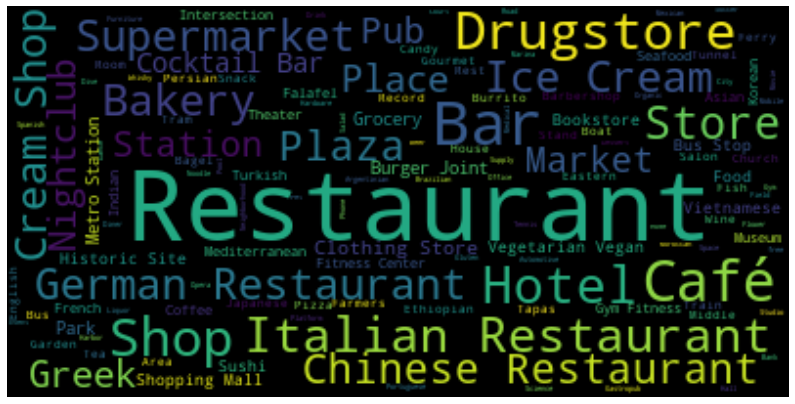

In [584]:
wc = WordCloud(background_color='black')

# generate the word cloud
wc.generate(Bonn_venues_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

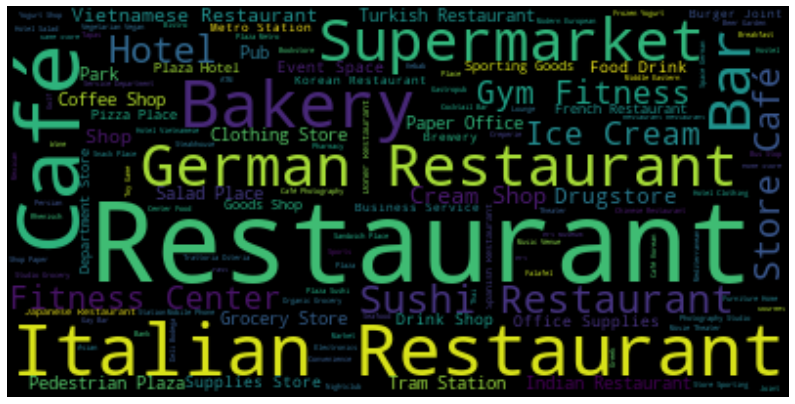

In [583]:
wc = WordCloud(background_color='black')

# generate the word cloud
wc.generate(Koeln_venues_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [493]:
Bonn_venues_onehot = pd.get_dummies(Bonn_venues[['Venue Category']], prefix="", prefix_sep="")


Bonn_venues_onehot.reset_index(drop=True, inplace= True)
# add neighborhood column back to dataframe
Bonn_venues_onehot['Neighborhood'] = Bonn_venues['Neighborhood'] 
Bonn_venues_onehot.head()

# move neighborhood column to the first column

allcol = list(Bonn_venues_onehot.columns)
allcol.remove('Neighborhood')

fixed_columns = ['Neighborhood'] +allcol 
Bonn_venues_onehot = Bonn_venues_onehot[fixed_columns]

Bonn_venues_onehot.head()

,Neighborhood,Argentinian Restaurant,Asian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Boat or Ferry,Bookstore,Brazilian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Candy Store,Chinese Restaurant,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Dance Studio,Dessert Shop,Diner,Dive Bar,Drugstore,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Stand,French Restaurant,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Market,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Persian Restaurant,Pet Store,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,Spanish Restaurant,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Theater,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,53111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,53111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [494]:
Bonn_ven_cat = Bonn_venues_onehot.groupby("Neighborhood").mean().reset_index()

In [495]:
Bonn_ven_cat.head()

,Neighborhood,Argentinian Restaurant,Asian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Boat or Ferry,Bookstore,Brazilian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Candy Store,Chinese Restaurant,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Dance Studio,Dessert Shop,Diner,Dive Bar,Drugstore,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Stand,French Restaurant,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Market,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Persian Restaurant,Pet Store,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,Spanish Restaurant,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Theater,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,53111,0.000000,0.011494,0.0,0.011494,0.011494,0.0,0.057471,0.0,0.011494,0.022989,0.0,0.011494,0.011494,0.011494,0.000000,0.045977,0.011494,0.022989,0.011494,0.0,0.022989,0.034483,0.011494,0.0,0.0,0.0,0.011494,0.034483,0.000000,0.011494,0.0,0.011494,0.0,0.0,0.011494,0.0,0.0,0.011494,0.011494,0.0,0.0,0.0,0.022989,0.0,0.000000,0.022989,0.011494,0.011494,0.0,0.0,0.0,0.022989,0.022989,0.034483,0.011494,0.000000,0.034483,0.011494,0.011494,0.0,0.011494,0.0,0.000000,0.011494,0.000000,0.0,0.0,0.011494,0.011494,0.011494,0.034483,0.0,0.0,0.011494,0.0,0.011494,0.011494,0.0,0.011494,0.0,0.045977,0.0,0.022989,0.011494,0.0,0.011494,0.0,0.0,0.011494,0.0,0.011494,0.011494,0.0,0.0,0.0,0.000000,0.011494,0.000000,0.011494,0.0,0.000000,0.0,0.000000,0.0,0.011494,0.011494,0.011494,0.011494,0.011494
1,53113,0.000000,0.000000,0.0,0.000000,0.037037,0.0,0.037037,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.037037,0.000000,0.0,0.000000,0.000000,0.037037,0.0,0.0,0.0,0.000000,0.000000,0.037037,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.037037,0.0,0.037037,0.037037,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.074074,0.000000,0.037037,0.037037,0.037037,0.000000,0.000000,0.0,0.000000,0.0,0.037037,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.074074,0.000000,0.0,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.037037,0.037037,0.000000,0.000000,0.0,0.037037,0.0,0.074074,0.0,0.000000,0.037037,0.000000,0.000000,0.000000
2,53115,0.142857,0.000000,0.0,0.000000,0.000000,0.0,0.142857,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,53117,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.

In [595]:
koelnBonn_venues_onehot = pd.get_dummies(koelnbonn_venues[['Venue Category']], prefix="", prefix_sep="")


#koelnBonn_venues_onehot.reset_index(drop=True, inplace= True)
# add neighborhood column back to dataframe
koelnBonn_venues_onehot['Neighborhood'] = koelnbonn_venues['Neighborhood'] 
koelnBonn_venues_onehot.head()

# move neighborhood column to the first column

allcol = list(koelnBonn_venues_onehot.columns)
allcol.remove('Neighborhood')

fixed_columns = ['Neighborhood'] +allcol 
koelnBonn_venues_onehot = koelnBonn_venues_onehot[fixed_columns]

koelnBonn_ven_cat = koelnBonn_venues_onehot.groupby("Neighborhood").mean().reset_index()
koelnBonn_ven_cat.head()

,Neighborhood,ATM,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bavarian Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Center,Business Service,Café,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,City Hall,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Hill,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Rhenisch Restaurant,River,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Schnitzel Restaurant,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Taxi,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,50667,0.01087,0.0,0.0,0.032609,0.01087,0.0,0.000000,0.0,0.0,0.0,0.0,0.010870,0.01087,0.010870,0.0,0.01087,0.0,0.01087,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.01087,0.032609,0.000000,0.00,0.0,0.0,0.000000,0.01087,0.032609,0.0,0.01087,0.021739,0.01087,0.000000,0.0,0.0,0.021739,0.000000,0.0,0.010870,0.01087,0.01087,0.000000,0.0,0.00,0.000000,0.0,0.0,0.01087,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.01087,0.0,0.0,0.010870,0.01087,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.010870,0.010870,0.00,0.0,0.0,0.000000,0.010870,0.043478,0.0,0.0,0.0,0.01087,0.0,0.01087,0.000000,0.032609,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.010870,0.0,0.054348,0.000000,0.032609,0.000000,0.000000,0.000000,0.0,0.0,0.01087,0.00,0.065217,0.010870,0.0,0.01087,0.01087,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.01087,0.00,0.0,0.01087,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0

In [687]:
num_top_venues = 5

for hood in Bonn_ven_cat['Neighborhood']:
    print("----"+hood+"----")
    temp = Bonn_ven_cat[Bonn_ven_cat['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values
          ('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----53111----
            venue  freq
0             Bar  0.06
1            Café  0.05
2           Plaza  0.05
3    Cocktail Bar  0.03
4  Ice Cream Shop  0.03


----53113----
               venue  freq
0         Restaurant  0.11
1              Hotel  0.07
2                Pub  0.07
3       Tram Station  0.07
4  Indian Restaurant  0.04


----53115----
                    venue  freq
0  Argentinian Restaurant  0.14
1                     Bar  0.14
2          Ice Cream Shop  0.14
3      Mexican Restaurant  0.14
4            Cocktail Bar  0.14


----53117----
                    venue  freq
0  Furniture / Home Store   1.0
1  Argentinian Restaurant   0.0
2                  Museum   0.0
3                Platform   0.0
4             Pizza Place   0.0


----53119----
                venue  freq
0  Chinese Restaurant   0.4
1         Supermarket   0.2
2                Park   0.2
3       Grocery Store   0.2
4              Museum   0.0


----53121----
                    venue  freq
0               

In [497]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## kClusters (5)

In [521]:
# set number of clusters
kclusters = 6

Bonn_grouped_clustering = Bonn_ven_cat.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bonn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 2, 0, 5, 4, 4, 4, 4], dtype=int32)

In [522]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Bonn_ven_cat['Neighborhood']

for ind in np.arange(Bonn_ven_cat.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bonn_ven_cat.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,53111,Bar,Plaza,Café,Nightclub,Drugstore,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Hotel,Historic Site
1,53113,Restaurant,Hotel,Tram Station,Pub,Indian Restaurant,Bus Stop,Greek Restaurant,Gourmet Shop,Intersection,Italian Restaurant
2,53115,Argentinian Restaurant,Bar,Intersection,Mexican Restaurant,Cocktail Bar,Tapas Restaurant,Ice Cream Shop,Bank,Event Space,Farmers Market
3,53117,Furniture / Home Store,Wine Bar,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food
4,53119,Chinese Restaurant,Park,Grocery Store,Supermarket,Wine Bar,French Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market


In [523]:
bonn_geo.rename(columns ={"Postal Code":"Neighborhood"}, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [524]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,53111,Bar,Plaza,Café,Nightclub,Drugstore,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Hotel,Historic Site
1,53113,Restaurant,Hotel,Tram Station,Pub,Indian Restaurant,Bus Stop,Greek Restaurant,Gourmet Shop,Intersection,Italian Restaurant
2,53115,Argentinian Restaurant,Bar,Intersection,Mexican Restaurant,Cocktail Bar,Tapas Restaurant,Ice Cream Shop,Bank,Event Space,Farmers Market
3,53117,Furniture / Home Store,Wine Bar,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food
4,53119,Chinese Restaurant,Park,Grocery Store,Supermarket,Wine Bar,French Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market


In [525]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge
Bonn_merged = neighborhoods_venues_sorted.join(bonn_geo.set_index('Neighborhood'), on='Neighborhood')

Bonn_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Place Name,State,State Abbreviation,City,Latitude,Longitude
0,4,53111,Bar,Plaza,Café,Nightclub,Drugstore,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Hotel,Historic Site,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7362,7.1002
1,4,53113,Restaurant,Hotel,Tram Station,Pub,Indian Restaurant,Bus Stop,Greek Restaurant,Gourmet Shop,Intersection,Italian Restaurant,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7230,7.1068
2,4,53115,Argentinian Restaurant,Bar,Intersection,Mexican Restaurant,Cocktail Bar,Tapas Restaurant,Ice Cream Shop,Bank,Event Space,Farmers Market,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7272,7.0851
3,2,53117,Furniture / Home Store,Wine Bar,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7610,7.0630
4,0,53119,Chinese Restaurant,Park,Grocery Store,Supermarket,Wine Bar,French Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Bonn,Nordrhein-Westfalen,NW,"Bonn, Stadt",50.7431,7.0590


In [526]:
Bonn_merged["Cluster Labels"].value_counts()

4    10
0     3
5     1
3     1
2     1
1     1
Name: Cluster Labels, dtype: int64

In [ ]:
# create map showing 4 clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Set1(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bonn_merged['Latitude'], Bonn_merged['Longitude'], Bonn_merged['Neighborhood'], Bonn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       

## Cluster the areas in Bonn
<div class="alert alert-block alert-info" style="margin-top: 20px">
<br> - here we compare bonn ereas and cluster the areas, as it shown the areas in the city center are similar to each other
<br> - bonn has serveral city center but two important in Bad Godesberg and Bonn central.
<br> - cluster 0 is always along the train rout
<div>

In [794]:
map_clusters

In [626]:
# koelnBonn_ven_cat
# set number of clusters
kclusters = 8

koelnBonn_grouped_clustering = koelnBonn_ven_cat.drop('Neighborhood', 1)

# run k-means clustering
kmeanskb = KMeans(n_clusters=kclusters, random_state=0).fit(koelnBonn_grouped_clustering)

num_top_venues = 30

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_kb = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_kb['Neighborhood'] = koelnBonn_ven_cat['Neighborhood']

for ind in np.arange(koelnBonn_ven_cat.shape[0]):
    neighborhoods_venues_sorted_kb.iloc[ind, 1:] = return_most_common_venues(koelnBonn_ven_cat.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_kb.head()

koelnBonn_geo.rename(columns ={"Postal Code":"Neighborhood"}, inplace=True)

# add clustering labels
neighborhoods_venues_sorted_kb.insert(0, 'Cluster Labels', kmeanskb.labels_)

# merge
koelnBonn_merged = neighborhoods_venues_sorted_kb.join(koelnBonn_geo.set_index('Neighborhood'), on='Neighborhood')
koelnBonn_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Place Name,State,State Abbreviation,City,Latitude,Longitude
0,3,50667,Italian Restaurant,Hotel,German Restaurant,Plaza,Gym / Fitness Center,Café,Brewery,Art Museum,Ice Cream Shop,Toy / Game Store,Steakhouse,Pedestrian Plaza,Clothing Store,Supermarket,Chinese Restaurant,Outdoor Supply Store,Chocolate Shop,Comedy Club,Perfume Shop,Concert Hall,Cantonese Restaurant,Paper / Office Supplies Store,Business Service,Poke Place,Event Space,Department Store,Electronics Store,Miscellaneous Shop,Exhibit,Mexican Restaurant,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9384,6.9543
1,2,50668,Hotel,Turkish Restaurant,Café,Italian Restaurant,Bakery,Pub,Movie Theater,German Restaurant,Hotel Bar,Restaurant,Drugstore,Currywurst Joint,Coffee Shop,Gay Bar,Gastropub,Mediterranean Restaurant,Burger Joint,Park,Korean Restaurant,French Restaurant,Seafood Restaurant,Food & Drink Shop,Chinese Restaurant,Supermarket,Church,Trattoria/Osteria,Event Space,Pizza Place,Japanese Restaurant,Thai Restaurant,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9477,6.9609
2,3,50670,Café,Italian Restaurant,Bakery,Supermarket,Hotel,Pub,Ice Cream Shop,French Restaurant,Burger Joint,Convenience Store,Restaurant,Japanese Restaurant,Movie Theater,Bar,Coffee Shop,German Restaurant,Plaza,Drugstore,Vietnamese Restaurant,Doner Restaurant,Brewery,Spanish Restaurant,Frozen Yogurt Shop,Pizza Place,Cocktail Bar,Gastropub,Salad Place,Gay Bar,Falafel Restaurant,Beer Garden,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9525,6.9571
3,3,50672,Sushi Restaurant,Gastropub,Hotel,Spanish Restaurant,Restaurant,Italian Restaurant,Business Center,Steakhouse,Lounge,Brazilian Restaurant,Snack Place,French Restaurant,Burger Joint,Café,Salad Place,Record Shop,Pub,Plaza,Multiplex,Hookah Bar,Office,Chinese Restaurant,Park,Indonesian Restaurant,Bar,German Restaurant,Indie Movie Theater,Gym / Fitness Center,Hill,Gym,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9466,6.9391
4,3,50674,Italian Restaurant,Cocktail Bar,Bar,Café,Vietnamese Restaurant,Sushi Restaurant,Gay Bar,Pub,Furniture / Home Store,Trattoria/Osteria,Japanese Restaurant,Tapas Restaurant,Indian Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Persian Restaurant,Hotel,Creperie,Coffee Shop,Pizza Place,Ramen Restaurant,Kebab Restaurant,Chinese Restaurant,Burrito Place,Restaurant,Burger Joint,Portuguese Restaurant,Plaza,Brewery,Photography Studio,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9326,6.9410


In [ ]:
# create map showing 4 clusters

# create map
map_clusters_kb = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Dark2(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(koelnBonn_merged['Latitude'], koelnBonn_merged['Longitude'], koelnBonn_merged['Neighborhood'], koelnBonn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters_kb)

<div class="alert alert-block alert-info" style="margin-top: 20px">
Clustering the areas in Bonn and Cologne
<br> - the areas in the city center of bonn and cologne are similar
<br> - Only few area has different feature where most neighborhoods are similar and surrounded with Cafe and resturants
<br> - 53229 in bonn and 51143 in cologne are similar. we will check why
<div>

In [795]:
map_clusters_kb

### Examine Clusters:

In [617]:
koelnBonn_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Place Name,State,State Abbreviation,City,Latitude,Longitude
0,5,50667,Italian Restaurant,Hotel,German Restaurant,Plaza,Gym / Fitness Center,Café,Brewery,Art Museum,Ice Cream Shop,Toy / Game Store,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9384,6.9543
1,2,50668,Hotel,Turkish Restaurant,Café,Italian Restaurant,Bakery,Pub,Movie Theater,German Restaurant,Hotel Bar,Restaurant,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9477,6.9609
2,5,50670,Café,Italian Restaurant,Bakery,Supermarket,Hotel,Pub,Ice Cream Shop,French Restaurant,Burger Joint,Convenience Store,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9525,6.9571
3,5,50672,Sushi Restaurant,Gastropub,Hotel,Spanish Restaurant,Restaurant,Italian Restaurant,Business Center,Steakhouse,Lounge,Brazilian Restaurant,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9466,6.9391
4,5,50674,Italian Restaurant,Cocktail Bar,Bar,Café,Vietnamese Restaurant,Sushi Restaurant,Gay Bar,Pub,Furniture / Home Store,Trattoria/Osteria,Köln,Nordrhein-Westfalen,NW,"Köln, Stadt",50.9326,6.9410


In [632]:
koelnBonn_merged.loc[koelnBonn_merged['Cluster Labels'] == 0, koelnBonn_merged.columns[[1] + list(range(2, 17))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
20,50858,Basketball Court,Asian Restaurant,Hotel,Golf Course,Fast Food Restaurant,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
32,51061,Bus Stop,Italian Restaurant,Hotel,Golf Course,Zoo,Fast Food Restaurant,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
55,53173,Hotel,Mediterranean Restaurant,Restaurant,Snack Place,Bar,Harbor / Marina,Boat or Ferry,Beer Garden,Park,Fish Market,Flea Market,Zoo,Flower Shop,Food,Food & Drink Shop


- they have hotel and Fish Market, Golf Course(for both of them) in most common venues, 
- in each area exist zoo, food Stands and ruck and Flea Market

In [633]:
koelnBonn_merged.loc[koelnBonn_merged['Cluster Labels'] == 5, koelnBonn_merged.columns[[1] + list(range(2, 17))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
18,50827,German Restaurant,Liquor Store,Supermarket,Park,Farmers Market,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
41,51143,German Restaurant,Bakery,Zoo,Fast Food Restaurant,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
61,53229,German Restaurant,Rest Area,Zoo,Farmers Market,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant


In [637]:
koelnBonn_merged.loc[koelnBonn_merged['Cluster Labels'] == 1, koelnBonn_merged.columns[[1] + list(range(2, 25))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue
10,50735,Brewery,Motel,Supermarket,Tram Station,Bakery,Fish & Chips Shop,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Zoo,Fast Food Restaurant,Garden,Falafel Restaurant,Exhibit,Event Space,Ethiopian Restaurant
19,50829,Tram Station,Intersection,Snack Place,Eastern European Restaurant,Zoo,Farmers Market,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Exhibit,Falafel Restaurant,Furniture / Home Store,Event Space,Ethiopian Restaurant,English Restaurant,Electronics Store
29,50996,Supermarket,Tram Station,Tennis Stadium,Garden,Zoo,Fast Food Restaurant,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Farmers Market,Falafel Restaurant,Exhibit,Event Space,Ethiopian Restaurant,English Restaurant,Electronics Store
38,51105,Supermarket,Tram Station,Ice Cream Shop,Beer Garden,Drugstore,Café,Flea Market,Flower Shop,Food,Food & Drink Shop,Zoo,Fish & Chips Shop,Food Stand,Food Truck,French Restaurant,Frozen Yogurt Shop,Fish Market,Farmers Market,Fast Food Restaurant,Garden,Falafel Restaurant,Exhibit,Event Space


<div class="alert alert-block alert-info" style="margin-top: 20px">
Now compare the similarities of 10 cities in germany by calculating the avarage of the ereas of one city
<div>

In [717]:
all_city_venues = []

for city in ["Hamburg","Dresden","München","Lübeck","Freiburg","Berlin","Potsdam","Trier","Weimar","Düsseldorf"]:
    try:
        city_geo = german_geo[german_geo["Place Name"]==city]
        address = city

        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(city, latitude, longitude))


        city_venues = getNearbyVenues(names=city_geo['Postal Code'],
                                       latitudes=city_geo['Latitude'],
                                       longitudes=city_geo['Longitude']
                                      )
        city_venues["city"] = city

        all_city_venues.append(city_venues)
        
    except:
        pass
    

The geograpical coordinate of Hamburg are 53.550341, 10.000654.
20038
20088
20146
20148
20149
20251
20253
20259
20350
20354
20535
20537
21031
21075
21077
21107
22047
22049
22083
22085
22115
22117
22147
22159
22177
22179
22297
22307
22335
22339
22415
22419
22453
22455
22459
22527
22559
22587
22609
22761
22765
22769
The geograpical coordinate of Dresden are 51.0493286, 13.7381437.
1067
1069
1097
1099
1108
1109
1127
1129
1139
1157
1159
1169
1187
1189
1217
1219
1237
1239
1257
1259
1277
1279
1307
1324
1326
1328
1462
1478
1314
The geograpical coordinate of München are 48.1371079, 11.5753822.
80331
80333
80335
80336
80337
80339
80469
80538
80539
80634
80636
80637
80638
80639
80686
80687
80689
80796
80797
80798
80799
80801
80802
80803
80804
80805
80807
80809
80933
80935
80937
80939
80992
80993
80995
80997
80999
81241
81243
81245
81247
81249
81369
81371
81373
81375
81377
81379
81475
81476
81477
81479
81539
81541
81543
81545
81547
81549
81667
81669
81671
81673
81675
81677
81679
81735
81737
81739

In [719]:
allcity_ven_df = pd.concat(all_city_venues)

In [720]:
allcity_ven_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,city
0,20038,53.5544,9.9946,Jungfernstieg,53.552862,9.993174,Plaza,Hamburg
1,20038,53.5544,9.9946,Binnenalster,53.555090,9.995134,Lake,Hamburg
2,20038,53.5544,9.9946,Restaurant Haerlin,53.555607,9.992444,French Restaurant,Hamburg
3,20038,53.5544,9.9946,Alsterfontäne,53.555096,9.996142,Fountain,Hamburg
4,20038,53.5544,9.9946,Mit freundlichen Grüßen,53.553018,9.992510,Café,Hamburg


In [722]:
#allcity_ven_df["Venue Category"].value_counts()

Hotel                                       858
German Restaurant                           783
Café                                        717
Museum                                      427
Plaza                                       390
Restaurant                                  380
Italian Restaurant                          339
Supermarket                                 314
History Museum                              304
Bakery                                      296
Coffee Shop                                 253
Vietnamese Restaurant                       248
Theater                                     241
Art Museum                                  230
Ice Cream Shop                              228
Bar                                         195
Gym / Fitness Center                        182
Drugstore                                   142
Bus Stop                                    138
Burger Joint                                136
Gourmet Shop                            

In [726]:
all_venues_onehot = pd.get_dummies(allcity_ven_df[['Venue Category']], prefix="", prefix_sep="")
all_venues_onehot['city'] = allcity_ven_df['city'] 
all_venues_onehot.reset_index(drop=True, inplace= True)

In [727]:
all_venues_onehot.head()

,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bathing Area,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Bosnian Restaurant,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cultural Center,Cupcake Shop,Currywurst Joint,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Manti Place,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Resta

In [728]:
# move neighborhood column to the first column
allcol = list(all_venues_onehot.columns)
allcol.remove('city')

fixed_columns = ['city'] +allcol 
all_venues_onehot = all_venues_onehot[fixed_columns]

print( all_venues_onehot.shape)

all_ven_cat = all_venues_onehot.groupby("city").mean().reset_index()

(13169, 389)


In [730]:
all_ven_cat

,city,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bathing Area,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Bosnian Restaurant,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cultural Center,Cupcake Shop,Currywurst Joint,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Manti Place,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese 

<div class="alert alert-block alert-danger" style="margin-top: 20px">
 The data frame shows that most cities don't have, for example, ATM. As we know that every town should have some ATM, we can conclude that it is due to some missing data from foursquare
<div>

In [733]:
# allcity_ven_df[allcity_ven_df['city']=="Berlin"]["Venue Category"].value_counts() 

In [782]:
# set number of clusters
kclusters = 4

all_grouped_clustering = all_ven_cat.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9] 

array([2, 1, 0, 0, 0, 0, 0, 3, 2], dtype=int32)

In [774]:
#all_grouped_clustering

In [783]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_germany = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_germany['city'] = all_ven_cat['city']

for ind in np.arange(all_ven_cat.shape[0]):
    neighborhoods_venues_sorted_germany.iloc[ind, 1:] = return_most_common_venues(all_ven_cat.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_germany.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Berlin,German Restaurant,Hotel,Museum,Café,History Museum,Plaza,Restaurant,Art Museum,Theater,Vietnamese Restaurant,Gym / Fitness Center,Ice Cream Shop,Gourmet Shop,Art Gallery,Concert Hall,Roof Deck,Brewery,Garden,Italian Restaurant,Scenic Lookout,Outdoor Sculpture,Exhibit,Church,Memorial Site,Opera House,Neighborhood,Bridal Shop,Supermarket,Bakery,Bar
1,Dresden,Supermarket,Café,Hotel,Bakery,Plaza,Nightclub,Bus Stop,Light Rail Station,Restaurant,Seafood Restaurant,Athletics & Sports,Skate Park,Museum,Hostel,Art Museum,Garden,Art Gallery,Tram Station,Clothing Store,Drugstore,Cable Car,Sporting Goods Shop,Food & Drink Shop,Greek Restaurant,Italian Restaurant,German Restaurant,Shopping Mall,Ice Cream Shop,Fast Food Restaurant,Electronics Store
2,Düsseldorf,Hotel,Italian Restaurant,Café,Bakery,Supermarket,Restaurant,Japanese Restaurant,Park,Coffee Shop,German Restaurant,Plaza,Clothing Store,Drugstore,Ice Cream Shop,Greek Restaurant,Pizza Place,Bar,Korean Restaurant,Chinese Restaurant,Tram Station,Frozen Yogurt Shop,Pub,Turkish Restaurant,Sushi Restaurant,Boutique,Ramen Restaurant,Grocery Store,Farmers Market,Indian Restaurant,Brewery
3,Hamburg,Café,Coffee Shop,Hotel,Burger Joint,Bakery,Restaurant,Italian Restaurant,Vietnamese Restaurant,Furniture / Home Store,Cosmetics Shop,German Restaurant,Clothing Store,Cocktail Bar,Plaza,Indie Movie Theater,Asian Restaurant,Nightclub,Middle Eastern Restaurant,Korean Restaurant,Candy Store,Gym / Fitness Center,Bar,Supermarket,Seafood Restaurant,French Restaurant,Drugstore,Sushi Restaurant,Fast Food Restaurant,Bookstore,Shoe Store
4,Lübeck,Supermarket,Café,German Restaurant,Bakery,Italian Restaurant,Hotel,Clothing Store,Seafood Restaurant,Drugstore,Bus Stop,Coffee Shop,Candy Store,Restaurant,Ice Cream Shop,Pizza Place,Vegetarian / Vegan Restaurant,Plaza,Museum,Asian Restaurant,Greek Restaurant,Bar,Sports Club,Gastropub,History Museum,Nightclub,Pier,Mexican Restaurant,Sushi Restaurant,Burger Joint,Theater


In [784]:
# add clustering labels
neighborhoods_venues_sorted_germany.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted_germany.head()

,Cluster Labels,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,2,Berlin,German Restaurant,Hotel,Museum,Café,History Museum,Plaza,Restaurant,Art Museum,Theater,Vietnamese Restaurant,Gym / Fitness Center,Ice Cream Shop,Gourmet Shop,Art Gallery,Concert Hall,Roof Deck,Brewery,Garden,Italian Restaurant,Scenic Lookout,Outdoor Sculpture,Exhibit,Church,Memorial Site,Opera House,Neighborhood,Bridal Shop,Supermarket,Bakery,Bar
1,1,Dresden,Supermarket,Café,Hotel,Bakery,Plaza,Nightclub,Bus Stop,Light Rail Station,Restaurant,Seafood Restaurant,Athletics & Sports,Skate Park,Museum,Hostel,Art Museum,Garden,Art Gallery,Tram Station,Clothing Store,Drugstore,Cable Car,Sporting Goods Shop,Food & Drink Shop,Greek Restaurant,Italian Restaurant,German Restaurant,Shopping Mall,Ice Cream Shop,Fast Food Restaurant,Electronics Store
2,0,Düsseldorf,Hotel,Italian Restaurant,Café,Bakery,Supermarket,Restaurant,Japanese Restaurant,Park,Coffee Shop,German Restaurant,Plaza,Clothing Store,Drugstore,Ice Cream Shop,Greek Restaurant,Pizza Place,Bar,Korean Restaurant,Chinese Restaurant,Tram Station,Frozen Yogurt Shop,Pub,Turkish Restaurant,Sushi Restaurant,Boutique,Ramen Restaurant,Grocery Store,Farmers Market,Indian Restaurant,Brewery
3,0,Hamburg,Café,Coffee Shop,Hotel,Burger Joint,Bakery,Restaurant,Italian Restaurant,Vietnamese Restaurant,Furniture / Home Store,Cosmetics Shop,German Restaurant,Clothing Store,Cocktail Bar,Plaza,Indie Movie Theater,Asian Restaurant,Nightclub,Middle Eastern Restaurant,Korean Restaurant,Candy Store,Gym / Fitness Center,Bar,Supermarket,Seafood Restaurant,French Restaurant,Drugstore,Sushi Restaurant,Fast Food Restaurant,Bookstore,Shoe Store
4,0,Lübeck,Supermarket,Café,German Restaurant,Bakery,Italian Restaurant,Hotel,Clothing Store,Seafood Restaurant,Drugstore,Bus Stop,Coffee Shop,Candy Store,Restaurant,Ice Cream Shop,Pizza Place,Vegetarian / Vegan Restaurant,Plaza,Museum,Asian Restaurant,Greek Restaurant,Bar,Sports Club,Gastropub,History Museum,Nightclub,Pier,Mexican Restaurant,Sushi Restaurant,Burger Joint,Theater


In [785]:
neighborhoods_venues_sorted_germany["Latitude"] = neighborhoods_venues_sorted_germany["city"].apply(lambda x: get_lan_lat(x)[0])
neighborhoods_venues_sorted_germany["Longitude"] = neighborhoods_venues_sorted_germany["city"].apply(lambda x: get_lan_lat(x)[1])

In [770]:
def get_lan_lat(ci):
    address = ci
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return [latitude,longitude]

In [771]:
neighborhoods_venues_sorted_germany

,Cluster Labels,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Latitude,Longitude
0,2,Berlin,German Restaurant,Hotel,Museum,Café,History Museum,Plaza,Restaurant,Art Museum,Theater,Vietnamese Restaurant,Gym / Fitness Center,Ice Cream Shop,Gourmet Shop,Art Gallery,Concert Hall,Roof Deck,Brewery,Garden,Italian Restaurant,Scenic Lookout,Outdoor Sculpture,Exhibit,Church,Memorial Site,Opera House,Neighborhood,Bridal Shop,Supermarket,Bakery,Bar,52.517037,13.388860
1,1,Dresden,Supermarket,Café,Hotel,Bakery,Plaza,Nightclub,Bus Stop,Light Rail Station,Restaurant,Seafood Restaurant,Athletics & Sports,Skate Park,Museum,Hostel,Art Museum,Garden,Art Gallery,Tram Station,Clothing Store,Drugstore,Cable Car,Sporting Goods Shop,Food & Drink Shop,Greek Restaurant,Italian Restaurant,German Restaurant,Shopping Mall,Ice Cream Shop,Fast Food Restaurant,Electronics Store,51.049329,13.738144
2,0,Düsseldorf,Hotel,Italian Restaurant,Café,Bakery,Supermarket,Restaurant,Japanese Restaurant,Park,Coffee Shop,German Restaurant,Plaza,Clothing Store,Drugstore,Ice Cream Shop,Greek Restaurant,Pizza Place,Bar,Korean Restaurant,Chinese Restaurant,Tram Station,Frozen Yogurt Shop,Pub,Turkish Restaurant,Sushi Restaurant,Boutique,Ramen Restaurant,Grocery Store,Farmers Market,Indian Restaurant,Brewery,51.225402,6.776314
3,0,Hamburg,Café,Coffee Shop,Hotel,Burger Joint,Bakery,Restaurant,Italian Restaurant,Vietnamese Restaurant,Furniture / Home Store,Cosmetics Shop,German Restaurant,Clothing Store,Cocktail Bar,Plaza,Indie Movie Theater,Asian Restaurant,Nightclub,Middle Eastern Restaurant,Korean Restaurant,Candy Store,Gym / Fitness Center,Bar,Supermarket,Seafood Restaurant,French Restaurant,Drugstore,Sushi Restaurant,Fast Food Restaurant,Bookstore,Shoe Store,53.550341,10.000654
4,0,Lübeck,Supermarket,Café,German Restaurant,Bakery,Italian Restaurant,Hotel,Clothing Store,Seafood Restaurant,Drugstore,Bus Stop,Coffee Shop,Candy Store,Restaurant,Ice Cream Shop,Pizza Place,Vegetarian / Vegan Restaurant,Plaza,Museum,Asian Restaurant,Greek Restaurant,Bar,Sports Club,Gastropub,History Museum,Nightclub,Pier,Mexican Restaurant,Sushi Restaurant,Burger Joint,Theater,53.866444,10.684738
5,0,München,Café,Italian Restaurant,Hotel,Bar,Supermarket,Bakery,Plaza,Bus Stop,Ice Cream Shop,German Restaurant,Drugstore,Asian Restaurant,Pizza Place,Vietnamese Restaurant,Restaurant,Chinese Restaurant,Sushi Restaurant,Coffee Shop,Cocktail Bar,Thai Restaurant,Gastropub,Bagel Shop,Indian Restaurant,Greek Restaurant,Park,Burger Joint,Fast Food Restaurant,Beer Garden,Spanish Restaurant,Bank,48.137108,11.575382
6,0,Potsdam,German Restaurant,Bakery,Supermarket,Hotel,Bus Stop,Café,French Restaurant,Drugstore,Furniture / Home Store,Plaza,Coffee Shop,Clothing Store,Trattoria/Osteria,Platform,Italian Restaurant,Bookstore,Train Station,Thai Restaurant,Indian Restaurant,Organic Grocery,Fast Food Restaurant,Restaurant,Tram Station,Asian Restaurant,Market,Seafood Restaurant,Sandwich Place,Science Museum,Ramen Restaurant,Cocktail Bar,52.400931,13.059140
7,3,Trier,Café,Coffee Shop,Hotel,Plaza,Drugstore,German Restaurant,Vietnamese Restaurant,Indian Restaurant,Bakery,Pub,Cocktail Bar,Sushi Restaurant,Dessert Shop,Supermarket,Historic Site,Pool,Italian Restaurant,Bed & Breakfast,Bar,Church,Burger Joint,Park,Shopping Mall,History Museum,Wine Bar,Pizza Place,Mobile Phone Shop,Hostel,Event Servic

In [786]:
# create map showing 4 clusters
#Germany Geographic coordinates. Germany is located at latitude 51.165691 and longitude 10.451526. It is part of Europe and the northern hemisphere.
# create map
map_clusters_all = folium.Map(location=[51.165691, 10.451526], zoom_start=6)
#map_clusters_all = folium.Map(location=[51.22172, 6.77616], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Set1(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted_germany['Latitude'], neighborhoods_venues_sorted_germany['Longitude'], neighborhoods_venues_sorted_germany['city'], neighborhoods_venues_sorted_germany['Cluster Labels']):
    #print(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters_all)
       
map_clusters_all

<div class="alert alert-block alert-info" style="margin-top: 20px">
 The cluster shows that most cities have similar features. Berlin and  Weimar are in a separate categorized group, and some towns like Trier are individual
<div>

In [ ]:
#Berlin and Weimar: cities of History Museum

In [790]:
neighborhoods_venues_sorted_germany.loc[neighborhoods_venues_sorted_germany['Cluster Labels'] == 2, neighborhoods_venues_sorted_germany.columns[[1] + list(range(2, 34))]]

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Latitude,Longitude
0,Berlin,German Restaurant,Hotel,Museum,Café,History Museum,Plaza,Restaurant,Art Museum,Theater,Vietnamese Restaurant,Gym / Fitness Center,Ice Cream Shop,Gourmet Shop,Art Gallery,Concert Hall,Roof Deck,Brewery,Garden,Italian Restaurant,Scenic Lookout,Outdoor Sculpture,Exhibit,Church,Memorial Site,Opera House,Neighborhood,Bridal Shop,Supermarket,Bakery,Bar,52.517037,13.388860
8,Weimar,Café,German Restaurant,Plaza,Hotel,Italian Restaurant,Restaurant,Supermarket,Bus Stop,Indian Restaurant,Bar,Bakery,Soccer Field,History Museum,Gym Pool,RV Park,Coffee Shop,Falafel Restaurant,Cocktail Bar,Dessert Shop,Gourmet Shop,Mediterranean Restaurant,Sushi Restaurant,Miscellaneous Shop,Theater,Museum,Park,Drugstore,Food & Drink Shop,Burger Joint,Palace,50.981049,11.329664
